# Práctica 12: Análisis de texto con nltk y wordcloud.

Para realizar esta práctica se utilizaron datos diferentes de cualquier otro trabajo anterior. Al igual que los demás, este se tomó de la página de Kaggle. Se trata de un csv en donde se toman las descripciones de diferentes tipos de vinos en diferentes partes del mundo.

Para poder iniciar con la práctica es necesario tener todas las herramientas que se van a utilizar instaladas. Se inicia con la herramienta de nltk.

NLTK, es un conjunto de bibliotecas y programas para el procesamiento del lenguaje natural (PLN) simbólico y estadísticos de la distribución de Python. NLTK incluye demostraciones gráficas y datos de muestra. NLTK está destinado a apoyar la investigación y la enseñanza en PLN o áreas muy relacionadas, que incluyen la lingüística empírica, las ciencias cognitivas, la inteligencia artificial, la recuperación de información, y el aprendizaje de la máquina.

In [1]:
import sys
!conda install --yes --prefix {sys.prefix} nltk


Solving environment: done

## Package Plan ##

  environment location: /Users/mayraberrones/anaconda3

  added / updated specs: 
    - nltk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.6.14               |           py37_0         2.1 MB

The following packages will be UPDATED:

    conda: 4.5.12-py37_0 --> 4.6.14-py37_0


conda-4.6.14         | 2.1 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


Después de haber instalado la nueva librería, podemos empezar a hacer las pruebas. En el caso de esta práctica se tuvo que hacer todos los procesos de terminal fuera de la herramienta de jupyter notebook por que se necesitaba abrir una ventana externa para instalar todas las bases de datos necesarias para realizar el trabajo, por esta razón aparece que todos los paquetes estan actualizados.

In [2]:
import nltk
import ssl
if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
print(stopwords.words("english")[:10])
from nltk.sentiment.vader import SentimentIntensityAnalyzer
s = SentimentIntensityAnalyzer() # en inglés hasta podemos distinguir entre palabras positivas y negativas
print(s.polarity_scores('useless'))
print(s.polarity_scores('marvelous'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4215}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5994}


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mayraberrones/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mayraberrones/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mayraberrones/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Una vez que si tienen importados los paquetes necesarios, se procede a mandar llamar el csv por medio de la librería de pandas.

El comando de 'head' se agrega para poder observar como estan distribuidos los datos.

In [10]:
import pandas as pd
d = pd.read_csv("https://raw.githubusercontent.com/mayraberrones94/Ciencia_de_Datos/master/wine-reviews/wine-rev.csv")
d.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Ya que se tiene el csv, el siguiente paso es el de limpiar los datos, como se ha hecho en todas las prácticas anteriores en donde se utiliza información nueva.

Los datos que de interés para este trabajo son el de 'country' que es el lugar de donde proviene el vino, 'description' que es la descripción que dieron los consumidores, y por útltimo 'variety' que es el tipo de vino que se maneja.

In [31]:

header = ['country', 'description', 'variety']
d.to_csv('solo-rev.csv', columns = header)
e = pd.read_csv('solo-rev.csv')
e.head(4)

,Unnamed: 0,country,description,variety
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",White Blend
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Portuguese Red
2,2,US,"Tart and snappy, the flavors of lime flesh and...",Pinot Gris
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Riesling


In [32]:
e.drop(e.columns[[0]], axis=1, inplace=True)
e.head(2)

,country,description,variety
0,Italy,"Aromas include tropical fruit, broom, brimston...",White Blend
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Portuguese Red


Ya que se tienen los datos sin información innecesaria, se hacen los mismos análisis para ver cuales son los datos con los que se puede realizar en la práctica, como por ejemplo, saber cuales son los datos únicos de 'country', ya que en la práctica de ejemplo de la Dra Elisa se utilizan las diferentes calificaciones de exámenes, en este se utilizarán distintos países.

In [6]:
e['country'].unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

In [81]:
e.to_csv('s-rev.csv', index=False)
read = pd.read_csv('s-rev.csv')
read.head(2)


,country,description,variety
0,Italy,"Aromas include tropical fruit, broom, brimston...",White Blend
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Portuguese Red


Fuera de la herramienta de jupyter notebook acomodaron los datos dentro del csv 's-rev', reenombrandolo 'rev-solo' con el programa 'puntuacion.py' proporcionado en la presentación de prueba, más un pequeño ajuste para que reacomodara y quitara el título de las columnas.

In [40]:
import ssl
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
import pandas as pd
pr = pd.read_csv('rev-solo.csv', header = None)
pr.head(3)

,0,1,2
0,Aromas include tropical fruit broom brimstone ...,Italy,White Blend
1,This is ripe and fruity a wine that is smooth ...,Portugal,Portuguese Red
2,Tart and snappy the flavors of lime flesh and ...,US,Pinot Gris


Aquí solo se observa una simple demostración de como quedaron los datos re acomodados antes de iniciar con los demás experimentos.

Se toman los nombres de las tres columnas en el orden en el que están en el csv. El idioma de dichos datos esta en inglés, y cuando se revisaron si había filas sin contestar, estas ya estaban rellenas con la leyenda de 'NaN', por lo que se modifica esa parte también.

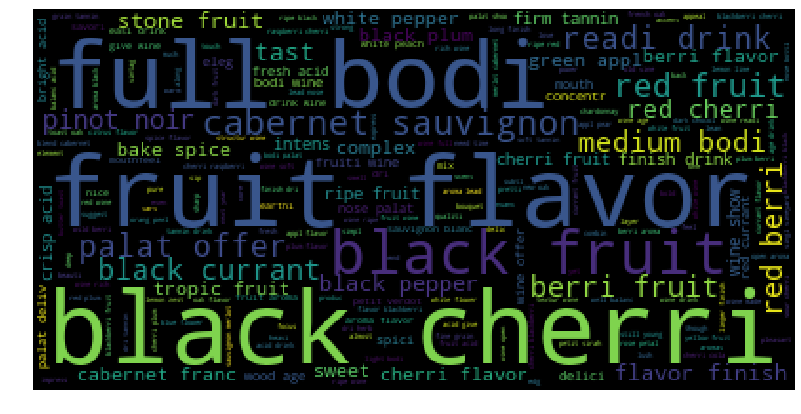

In [41]:
pr.columns = ['description', 'country', 'variety']
n = len(pr)
spa = stopwords.words("english")
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'\w+') # para eliminar puntuación
reemplazos = []
for r in range(n):
    original = pr.description[r]
    reemplazo = ''
    if original != 'NaN':
        quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in spa]
        reemplazo = ' '.join(quedar)
    reemplazos.append(reemplazo)
pr['limpios'] = reemplazos
texto = ' '.join(reemplazos)
nube = WordCloud().generate(texto)
plt.rcParams["figure.figsize"] = [15, 7]
plt.imshow(nube)
plt.axis("off")
plt.show()

Al correr el experimento se pueden ver las palabras más repetidas en las descripciones de los vinos. Parecen ser congruentes, ya que se concentran en los sabores que se aprecian en un vino.

Ahora, para separar los datos, se hacen 3 archivos csv diferentes, con tres de los países que se encuentran en la columna 'country'. Estos fueron elegidos porque eran los primeros tres que aparecían en la lista. Los nombres son 'US', 'Italy' y 'Portugal'.

In [52]:
header = ['description','country',  'variety']
writer = e[e['country'] == 'US']
writer.to_csv('us-wine.csv', columns = header, index=False)

lol = pd.read_csv('us-wine.csv')
lol.head(4)


,description,country,variety
0,"Tart and snappy, the flavors of lime flesh and...",US,Pinot Gris
1,"Pineapple rind, lemon pith and orange blossom ...",US,Riesling
2,"Much like the regular bottling from 2012, this...",US,Pinot Noir
3,"Soft, supple plum envelopes an oaky structure ...",US,Cabernet Sauvignon


In [53]:
header = ['description','country',  'variety']
writer = e[e['country'] == 'Italy']
writer.to_csv('italy-wine.csv', columns = header, index=False)

lol = pd.read_csv('italy-wine.csv')
lol.head(4)

,description,country,variety
0,"Aromas include tropical fruit, broom, brimston...",Italy,White Blend
1,"Here's a bright, informal red that opens with ...",Italy,Frappato
2,This is dominated by oak and oak-driven aromas...,Italy,Nerello Mascalese
3,Delicate aromas recall white flower and citrus...,Italy,White Blend


In [54]:
header = ['description','country',  'variety']
writer = e[e['country'] == 'Portugal']
writer.to_csv('portugal-wine.csv', columns = header, index=False)

lol = pd.read_csv('portugal-wine.csv')
lol.head(4)

,description,country,variety
0,"This is ripe and fruity, a wine that is smooth...",Portugal,Portuguese Red
1,"Grown on the sandy soil of Tejo, the wine is t...",Portugal,Touriga Nacional
2,"This bottling shows a rich, wood-aged wine, fu...",Portugal,Portuguese White
3,"From an estate in the south of the Alentejo, t...",Portugal,Portuguese Red


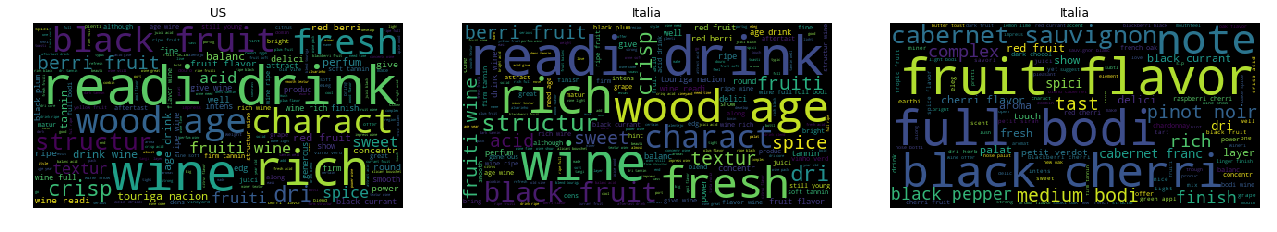

In [68]:
import ssl
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
dini = pd.read_csv("portugal-wine1.csv", header = None)
dmcu = pd.read_csv("us-wine1.csv", header = None)
dord = pd.read_csv("italy-wine1.csv", header = None)
cols = ['description', 'country', 'variety']
dini.columns = cols
dmcu.columns = cols
dord.columns = cols
spa = stopwords.words("english")
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'\w+') # para eliminar puntuación
plt.rcParams["figure.figsize"] = [18, 9]
f = plt.figure() 
lbls = ["Portugal", "US", "Italia"]
i = 1
for d in [dini, dmcu, dord]:
    lbl = lbls.pop(0)
    reemplazos = []
    for r in range(len(d)):
        original = d.description[r]
        reemplazo = ''
        if original != 'NaN':
            quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in spa]
            reemplazo = ' '.join(quedar)
        reemplazos.append(reemplazo)
    d['limpios'] = reemplazos
    for tipo in lbls:
        sf = plt.subplot(3, 3, i)
        i += 1
        texto = ' '.join(reemplazos)
        sf.set_title(tipo)
        nube = WordCloud().generate(texto)
        sf.imshow(nube)
        sf.axis("off")
plt.tight_layout()
plt.show()



Siguiendo los pasos del ejemplo se tienen tres mapas de texto diferentes. En estos casos ya se puede apreciar una diferencia notoria en cada uno, dejando más claro cuales son las características que los distinguen de los demás países.

Para la siguiente parte del experimento se necesitó descargar una librería nueva, llamada 'pyspellchecker'. Esta herramienta es utilizada para asegurar de que no existan errores de ortografía dentro de los bloques de texto que se le introduce al código como descripción.

In [72]:
import sys
!{sys.executable} -m pip install pyspellchecker

    100% |████████████████████████████████| 1.9MB 5.3MB/s eta 0:00:01
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import ssl
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from spellchecker import SpellChecker
sc = SpellChecker()
adicionales = [ 'ready', 'texture']
if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
d = pd.read_csv("portugal-wine1.csv", header = None)
d.columns = ['description', 'country', 'variety']
spa = stopwords.words("english") 
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'\w+') # para eliminar puntuación
plt.rcParams["figure.figsize"] = [12, 6]
texto = ''
for original in d.description:
    palabras = tokenizer.tokenize(original)
    revisadas = []
    for p in sc.known(palabras):
        revisadas += [p] * palabras.count(p) # para no alterar las frecuencias       
    for p in sc.unknown(palabras):
         revisadas += [sc.correction(p)] * palabras.count(p)
    inicial = [stemmer.stem(p) for p in revisadas if p.lower() not in spa]
    quedar = [p for p in inicial if p not in adicionales]
    texto += ' '.join(quedar) + ' '
plt.title('')
nube = WordCloud().generate(texto)
plt.imshow(nube)
plt.axis("off")
plt.show()

KeyboardInterrupt: 


En esta parte del experimento se inició con el csv que contenía todos los datos y se realizó un experimento similar al del ejemplo de la página de la Dra, tratando de ahorrar espacio y eliminar características seleccionando uno de los países y descartando todos los demás, pero el procesamiento se le dió 20 minutos de corrida antes de interrumpirlo.

Después se le dió un archivo más pequeño (solamente los datos de Portugal) para comprobar si el tiempo de 20 minutos era suficiente en este caso, pero también se tuvo que detener porque seguía procesando.

Para el experimento completo se utilizaron las palabras más comunes tanto en el resultado de la primer imagen, como en los resultados individuales. Se decidió disminurilas, y después cambiarlas cuando se cambió de csv de entrada. En el caso utilizado de Portugal, las únicas palabras utilizadas que parecían tener error fueron las de 'Ready' y 'texture'. 


Este experimento fue interesante ya que me permitió hacer un extracto de un csv bastante extenso. La cantidad de filas contenidas en el archivo original era de 130 000 descripciones de vinos, por lo que verlo reducido a unas cuantas palabras, me parece de bastante utilidad.